<a href="https://colab.research.google.com/github/100495829/Practica_AA/blob/main/Practica_AA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MIEMBROS DEL GRUPO

*   Mario Ramos Salsón (100495849@alumnos.uc3m.es)
*   Víctor Martínez de las Heras (100495829@alumnos.uc3m.es)

# ANÁLISIS EXPLORATORIO DE DATOS SIMPLIFICADO:

Para la selección de datos hemos elegido el NIA 100...29, por lo que nos corresponden los archivos numero 2+9=**11**.

Ponemos el .head para que solo nos muestre todas las instancias, ya que son bastantes.

In [30]:
import pandas as pd
import random

df = pd.read_csv("./attrition_availabledata_11.csv.gz", compression="gzip")
pd.set_option('display.max_columns', None)
df.head()

,hrs,absences,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,9.105522,8,3,4,4.0,3.0,2.0,19,Travel_Rarely,Research & Development,5,2,Life Sciences,1,4280,Male,1,Manager,Single,53320,1.0,Y,23,8,1,0.0,2,0,0,0,Yes
1,6.751686,12,3,3,2.0,3.0,2.0,34,Travel_Rarely,Sales,1,1,Marketing,1,2047,Female,2,Laboratory Technician,Married,24760,1.0,Y,19,8,0,6.0,2,6,1,3,No
2,5.630897,20,2,3,1.0,3.0,1.0,28,Travel_Rarely,Sales,8,4,Marketing,1,3752,Male,1,Laboratory Technician,Divorced,163070,1.0,Y,16,8,0,1.0,3,1,0,0,No
3,5.850785,13,4,3,3.0,1.0,3.0,29,Travel_Rarely,Research & Development,1,3,Medical,1,2303,Female,1,Manager,Married,23140,3.0,Y,13,8,0,9.0,5,7,0,7,No
4,5.790394,13,2,3,1.0,3.0,1.0,28,Travel_Rarely,Sales,8,4,Marketing,1,2282,Male,1,Laboratory Technician,Divorced,163070,1.0,Y,16,8,0,1.0,3,1,0,0,No


## NUMERO DE INSTANCIAS Y COLUMNAS:
El numero de variables e instancias se puede sacar rápidamente gracias al metodo shape de pandas, que devuelve una tupla de la forma (Nfilas, Ncolumnas).

In [31]:
print(f"Filas: {df.shape[0]}, Columnas: {df.shape[1]}")

Filas: 2940, Columnas: 31


## CLASIFICACIÓN DE VARIABLES:

El número total de instancias es de 2941 y de variables 31.

Las variables pueden ser de tres tipos: categoricas, ordinales o numéricas. Estudiando el problema las ghemos clasificado de la siguiente forma:


*   Categóricas: BusinessTravel, Department, EducationField, Gender, JobRole, MaritalStatus, Over18, Attrition.
*   Ordinales: JobInvolvement, PerformanceRating, EnvironmentSatisfaction, JobSatisfaction, WorkLifeBalance, Education, JobLevel, StockOptionLevel.
*   Numéricas: hrs, absences, Age, DistanceFromHome, MonthlyIncome, NumCompaniesWorked, PercentSalaryHike, StandardHours, TotalWorkingYears, TrainingTimesLastYear, YearsAtCompany, YearsSinceLastPromotion, YearsWithCurrManager.

También podríamos haber usado algunas funciones para guiarnos un poco en esta división.

In [32]:
print(f"Numericas: {df.select_dtypes(include=['number']).columns}")
print(f"Categóricas: {df.select_dtypes(include=['object']).columns}")

Numericas: Index(['hrs', 'absences', 'JobInvolvement', 'PerformanceRating',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'Age',
       'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeID',
       'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')
Categóricas: Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'Attrition'],
      dtype='object')


### CARDINALIDAD DE LAS VARIABLES

En cuanto a la cardinalidad de las variables categóricas, podemos llegar a encontrar dos que tienen una cardinalidad un poco alta, JobRole y EducationField.

### VARIABLES CON VALORES FALTANTES

Para ver si existen variables con valores faltantes, lo podemos hacer mediante código.

In [33]:
print(df.isnull().sum())

hrs                         0
absences                    0
JobInvolvement              0
PerformanceRating           0
EnvironmentSatisfaction    12
JobSatisfaction            11
WorkLifeBalance            27
Age                         0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         11
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           5
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
Attrition                   0
dtype: int64


Como podemos ver, hay 5 variables con valores faltantes:

* EnviromentSatisfaction: 12 valores faltantes.
* JobSatisfaction: 11 valores faltantes.
* WorkLifeBalance: 27 valores faltantes.
* NumCompaniesWorked: 11 valores faltantes.
* TotalWorkingYears: 5 valores faltantes.

### VARIABLES CON VALORES CONSTANTES

Para ver si existen columnas con valores constantes, lo podemos hacer usando una línea de código.

In [34]:
print(df.loc[:, df.nunique() == 1].columns)

Index(['EmployeeCount', 'Over18', 'StandardHours'], dtype='object')


Como se puede apreciar, la respuesta es sí, tenemos 3 variables con valores constantes.

* EmployeeCount: Valor constante: 1
* Over18: Valor constante: Yes
* StandardHours: Valor constante: 8

Además tambien nos encontramos una columna de ID llamada EmployeeID, que representa un identificador único para cada empleado.

## CLASIFICACIÓN DEL PROBLEMA

Se trata de un problema de **clasificación** debido a que la columna a predecir es "Attrition", cuyo valor puede ser verdadero o falso. Este valor representa si un empleado a dejado la empresa o no.

# DECIDIR CÓMO SE VA A REALIZAR LA EVALUACIÓN

Para realizar la evaluación, se empleará para optimización de hiperparámetros (HPO) y comparación de métodos. Se probarán diferentes enfoques:

Preprocesamiento: Se evaluarán tres métodos de escalado (MinMaxScaler, StandardScaler, RobustScaler) y dos métodos de imputación (media y mediana).
Por otro lado se compararán K-Nearest Neighbors y árboles de decisión con hiperparámetros por defecto y ajustados.

Con estos diferentes métodos, se medirán tiempos de entrenamiento y el impacto de los hiperparámetros en los resultados.

Al final, la mejor combinación de preprocesamiento y modelo será validada con el conjunto de test, para adquirir la estimación del rendimiento a futuro. La métrica principal será balanced accuracy, junto con TPR (True Positive Rate) y TNR (True Negative Rate). El mejor modelo será usado para generar predicciones en el conjunto de competición.

La división entre los conjuntos Train y Test se ha llevado a cabo de la siguiente manera. Dando un tamaño de 2/3 del total de datos a train y el 1/3 restante a test.

Con respecto a la precisión, se empleará la precisión balanceada. Esto se debe a que, en casos donde las clases no estén equilibradas, es decir, cuando una clase tenga una frecuencia significativamente mayor que la otra, el modelo podría sesgarse hacia la clase mayoritaria. Como resultado, aunque lograría una alta tasa de aciertos en dicha clase, su desempeño sería deficiente al clasificar instancias de la clase minoritaria.

El uso de la precisión balanceada permite mitigar este problema al considerar de manera equitativa ambas clases, asegurando una evaluación más representativa del rendimiento del modelo.

In [35]:
import numpy as np
from sklearn.model_selection import train_test_split

# Eliminamos la fila Attrition
X = df.drop("Attrition", axis=1) #El valor 1 indica que elige columnas en vez de filas
y = df["Attrition"]

# Separamos en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42)

# MÉTODOS BÁSICOS: KNN Y TREES

Con el siguiente estudio decidimos los metodos de escalado e imputacion mas adecuados para este problema.

Los métodos de escalado utilizados serán:

*   MinMax
*   Standard
*   Robust

Y los métodos de imputación utilizados serán:


*   Media
*   Mediana

Para decidir que método de escalado e imputación es mejor, los probaremos todos con todos, es decir cada escalado con cada imputación. Una vez probados todos compararemos su precisión para determinar cual es el más adecuado.

Además, se miraran tambien las tasas de TPR (True Positive Rate) y TNR (True Negative Rate) para medir la cantidad de aciertos y falsos positivos.


Evaluando: Escalador = standard, Imputador = mean
Accuracy: 0.8311, Balanced Accuracy: 0.5696, TPR: 0.1812, TNR: 0.9579


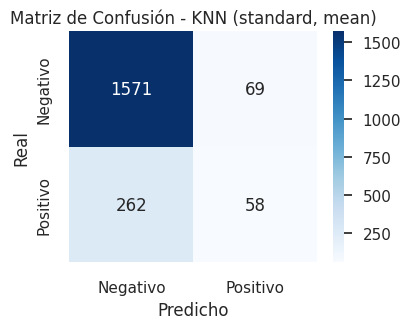


Evaluando: Escalador = standard, Imputador = median
Accuracy: 0.8311, Balanced Accuracy: 0.5708, TPR: 0.1844, TNR: 0.9573


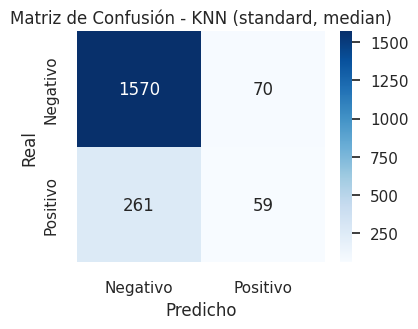


Evaluando: Escalador = minmax, Imputador = mean
Accuracy: 0.8429, Balanced Accuracy: 0.6143, TPR: 0.2750, TNR: 0.9537


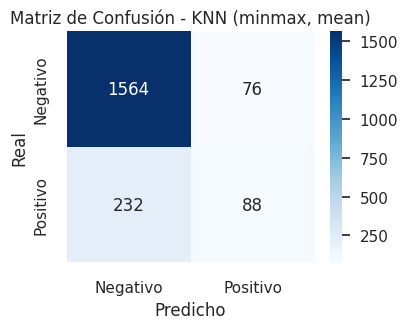


Evaluando: Escalador = minmax, Imputador = median
Accuracy: 0.8423, Balanced Accuracy: 0.6128, TPR: 0.2719, TNR: 0.9537


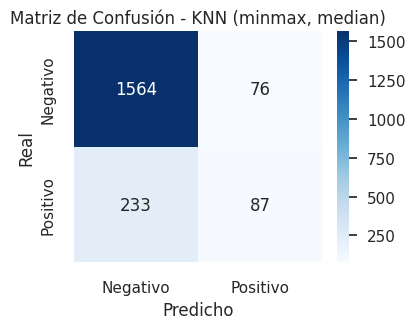


Evaluando: Escalador = robust, Imputador = mean
Accuracy: 0.8439, Balanced Accuracy: 0.5973, TPR: 0.2313, TNR: 0.9634


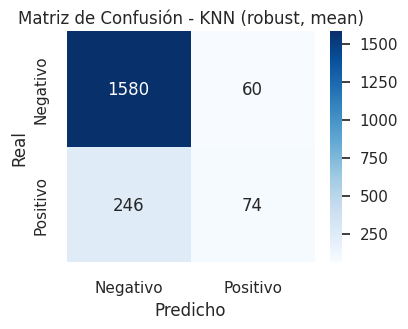


Evaluando: Escalador = robust, Imputador = median
Accuracy: 0.8439, Balanced Accuracy: 0.5961, TPR: 0.2281, TNR: 0.9640


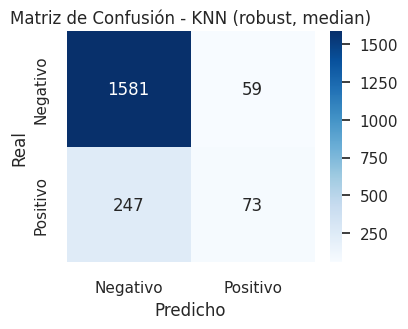



Mejor configuración:
Escalador: minmax, Imputador: mean
Balanced Accuracy: 0.6143


In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer, make_column_selector as selector
from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder
from sklearn.metrics import classification_report, balanced_accuracy_score, accuracy_score, confusion_matrix

# Definimos el clasificador (KNN)
knn = KNeighborsClassifier()

# Definimos las opciones de escaladores e imputadores
scalers = {
    "standard": StandardScaler(),
    "minmax": MinMaxScaler(),
    "robust": RobustScaler()
}

imputers = {
    "mean": SimpleImputer(strategy="mean"),
    "median": SimpleImputer(strategy="median")
}

# Almacenamos los mejores resultados
best_score = 0
best_config = None
results = []

# Defiimos el StratifiedKFold con 3 folds

skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Iteraramos sobre los escaladores e imputadores
for scaler_name, scaler in scalers.items():
    for imputer_name, imputer in imputers.items():
        print(f"\nEvaluando: Escalador = {scaler_name}, Imputador = {imputer_name}")

        # Preprocesador para columnas numéricas
        numeric_transformer = Pipeline([
            ("imputation", imputer),
            ("scaling", scaler)
        ])

        # Preprocesador para las columnas categóricas
        categorical_transformer = Pipeline([
            ("imputation", SimpleImputer(strategy="most_frequent")),
            ("encoding", OneHotEncoder(handle_unknown="ignore"))
        ])

        # ColumnTransformer para aplicar las transformaciones adecuadas
        preprocessor = ColumnTransformer(
            transformers=[
                ("num", numeric_transformer, selector(dtype_include=["int64", "float64"])),
                ("cat", categorical_transformer, selector(dtype_include="object")),
            ]
        )

        # Pipeline final
        pipeline = Pipeline([
            ("preprocessor", preprocessor),
            ("classifier", knn)
        ])

        # Obtenemos las predicciones mediante validación cruzada
        y_pred = cross_val_predict(pipeline, X_train, y_train, cv=skf)

        # Calculamos las métricas
        acc = accuracy_score(y_train, y_pred)
        bal_acc = balanced_accuracy_score(y_train, y_pred)

        # Matriz de confusión para calcular TPR y TNR
        cm = confusion_matrix(y_train, y_pred)
        tn, fp, fn, tp = cm.ravel()
        tpr = tp / (tp + fn)  # Sensibilidad (recall de la clase positiva)
        tnr = tn / (tn + fp)  # Especificidad (recall de la clase negativa)

        # Guardamos los resultados
        results.append((scaler_name, imputer_name, acc, bal_acc, tpr, tnr))

        # Vemos si es la mejor configuración
        if bal_acc > best_score:
            best_score = bal_acc
            best_config = (scaler_name, imputer_name)

        # Mostramos los resultados
        print(f"Accuracy: {acc:.4f}, Balanced Accuracy: {bal_acc:.4f}, TPR: {tpr:.4f}, TNR: {tnr:.4f}")

        # Dibujamos la matriz de confusión
        plt.figure(figsize=(4, 3))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                   xticklabels=["Negativo", "Positivo"],
                   yticklabels=["Negativo", "Positivo"])
        plt.xlabel("Predicho")
        plt.ylabel("Real")
        plt.title(f"Matriz de Confusión - KNN ({scaler_name}, {imputer_name})")
        plt.show()

# Mostramos la mejor configuración encontrada
print("\n\nMejor configuración:")
print(f"Escalador: {best_config[0]}, Imputador: {best_config[1]}")
print(f"Balanced Accuracy: {best_score:.4f}")

Una vez combinado todos los escladores y todos los imputers, concluimos que para nuestros datos, la mejor configuración es una escalador minmax junto con un imputer mean. Esto nos da una precisión balanceada de 0.6143.

## HIPERPARÁMETROS POR DEFECTO

Una vez seleccionados el escalador y el imputador más precisos, estos serán evaluados utilizando tanto el método KNN como los Árboles de Decisión (Trees). En esta etapa, los modelos se probarán inicialmente con sus hiperparámetros por defecto y, posteriormente, con hiperparámetros ajustados para mejorar su rendimiento.

Es importante señalar que la selección del escalador e imputador más precisos se llevó a cabo utilizando el método KNN. Por esta razón, la evaluación de KNN con sus hiperparámetros por defecto, junto con el escalador MinMax y el imputador Mean, ya ha sido realizada. No obstante, se ejecutará nuevamente con el fin de compararlo directamente con el desempeño de los Árboles de Decisión.

In [37]:
import time
from sklearn.tree import DecisionTreeClassifier

# Definimos el clasificador del Árbol de decisión

tree = DecisionTreeClassifier(random_state=42)

# Escaler e inputer del paso anterior
scaler = MinMaxScaler()
imputer = SimpleImputer(strategy="mean")

numeric_transformer = Pipeline([
    ("imputation", imputer),
    ("scaling", scaler)
])

categorical_transformer = Pipeline([
    ("imputation", SimpleImputer(strategy="most_frequent")),
    ("encoding", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, selector(dtype_include=["int64", "float64"])),
        ("cat", categorical_transformer, selector(dtype_include="object")),
    ]
)

# Pipeline final
pipeline_knn = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", knn)
])

pipeline_tree = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", tree)
])


# Evaluamos KNN por defecto
print("Evaluando KNN con hiperparámetros por defecto")
start_time = time.time()
knn_default = cross_val_score(pipeline_knn, X_train, y_train, cv=skf, scoring="balanced_accuracy")
elapsed_time = time.time() - start_time
print(f"Balanced Accuracy: {np.mean(knn_default)}")
print(f"Tiempo de entrenamiento: {elapsed_time:.4f} segundos")

# Mostramos los parámetros por defecto usados
print("Parámetros por defecto usados:")
print(knn.get_params())
print("\n")


# Evaluamos el Árbol de Decisión por defecto
print("Evaluando Árbol de Decisión con hiperparámetros por defecto")
start_time = time.time()
tree_default = cross_val_score(pipeline_tree, X_train, y_train, cv=skf, scoring="balanced_accuracy")
elapsed_time = time.time() - start_time
print(f"Balanced Accuracy: {np.mean(tree_default)}")
print(f"Tiempo de entrenamiento: {elapsed_time:.4f} segundos")

# Mostramos los parámetros por defecto usados
print("Parámetros por defecto usados:")
print(tree.get_params())

Evaluando KNN con hiperparámetros por defecto
Balanced Accuracy: 0.6143108640917339
Tiempo de entrenamiento: 0.2253 segundos
Parámetros por defecto usados:
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


Evaluando Árbol de Decisión con hiperparámetros por defecto
Balanced Accuracy: 0.7788052666852469
Tiempo de entrenamiento: 0.2390 segundos
Parámetros por defecto usados:
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': 'best'}


Tras ejecutar ambos métodos con sus hiperparámetros por defecto, se observa que la precisión del modelo KNN es idéntica a la obtenida en la fase de selección del escalador e imputador, ya que, como se mencionó previamente, esta configuración ya había sido evaluada.

Asimismo, se evidencia que, sin realizar ningún ajuste en los hiperparámetros, el modelo basado en Árboles de Decisión (Trees) presenta una mayor precisión, alcanzando un valor de 0.7788.

## AJUSTE DE HIPERPARÁMETROS

A continuación, se ajustarán los hiperparámetros tanto del método KNN como de los Arboles.

Para el KNN hemos elegido los siguientes hiperparámetros:


*   Número de vecinos
*   Tipos de pesos (Establece una prioridad a los K vecinos más cercanos)
*   Tipo de algoritmo para encontrar a los vecinos más cercanos

Queremos destacar que a la hora de elegir el número de vecinos, hemos decidio utilizar números impares. Esto evita que haya un problema de empate de distancia. Ya que, si el número es par puede suceder que haya un vecino a cada lado con la misma distancia, pero al ser impar, te asguras de que al menos siempre va a haber uno más a un lado que al otro.

Para los Arboles de decisión hemos elegido los siguientes hiperparámetros:


*   MaxDepth (Máxima profundidad del árbol)
*   MinSamplesSplit (Número mínimo de instancias para dividir un nodo interno)
*   Criterion (Forma utilizada para dividir los nodos)

Para determinar qué modelo ofrece un mejor rendimiento, nos centraremos principalmente en el valor de best_score, en lugar de la balanced accuracy. Esto se debe a que, al utilizar hiperparámetros en combinación con GridSearchCV y StratifiedKFold, la balanced accuracy refleja únicamente el desempeño en uno de los folds, y no el del modelo global. En cambio, best_score representa el promedio del rendimiento a lo largo de todos los folds, lo cual permite identificar de manera más precisa la combinación óptima de hiperparámetros.

También, miraremos el tiempo de ejecución de cada uno para ver cual tarda más de los dos.

### AJUSTE HIPERPARÁMETROS 1

Para llevar a cabo un análisis riguroso de los hiperparámetros, comenzaremos comparando la precisión de los modelos KNN y árboles de decisión utilizando únicamente dos hiperparámetros. Posteriormente, se añadirá un tercer hiperparámetro con el fin de observar la evolución del rendimiento y, de este modo, analizar de forma más clara y aislada el efecto individual de cada hiperparámetro.

Para KNN miraremos primero:


*   Número de vecinos
*   Tipo de pesos

Para los árboles miraremos primero:


*   MaxDepth
*   MinSamplesSplit





In [38]:
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.metrics import accuracy_score, balanced_accuracy_score

# Definimos los hiperparámetros para KNN y los Árbol de Decisión
knn_params = {
    "classifier__n_neighbors": [1, 3, 5, 7, 9],
    "classifier__weights": ["uniform", "distance"],
}


tree_params = {
    "classifier__max_depth": list(range(1, 21, 2)),
    "classifier__min_samples_split": list(range(2, 21, 2)),
}

# Función para evaluar cada combinación de hiperparámetros con GridSearchCV
def evaluate_model_with_grid_search(classifier, param_grid, X_train, y_train, X_test, y_test):
    pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("classifier", classifier)
    ])

    # GridSearchCV con cross-validation
    grid_search = GridSearchCV(
        pipeline,
        param_grid,
        cv=skf,
        scoring='balanced_accuracy',
        n_jobs=-1,
        error_score='raise'
    )

    start_time = time.time()
    grid_search.fit(X_train, y_train)
    elapsed_time = time.time() - start_time

    best_model = grid_search.best_estimator_

    # Calculamos las métricas en el conjunto de prueba
    y_pred = best_model.predict(X_test)
    bal_acc = balanced_accuracy_score(y_test, y_pred)

    return elapsed_time, bal_acc, grid_search.best_score_

# Evaluamos KNN
print("\nEvaluando KNN con optimización de hiperparámetros...")

knn_time, knn_bal_acc, KNN_best_score = evaluate_model_with_grid_search(
    knn, knn_params, X_train, y_train, X_test, y_test
)
print(f"Balanced Accuracy KNN: {knn_bal_acc:.4f}")
print(f"Best score: {KNN_best_score}")
print(f"Tiempo KNN: {knn_time:.4f} segundos")

# Evaluamos el Árbol de Decisión
print("\nEvaluando Árbol de Decisión con optimización de hiperparámetros...")

tree_time, tree_bal_acc, tree_best_score = evaluate_model_with_grid_search(
    tree, tree_params, X_train, y_train, X_test, y_test
)
print(f"Balanced Accuracy Árbol: {tree_bal_acc:.4f}")
print(f"Best score: {tree_best_score}")
print(f"Tiempo Árbol: {tree_time:.4f} segundos")


Evaluando KNN con optimización de hiperparámetros...
Balanced Accuracy KNN: 0.8777
Best score: 0.7721580107425279
Tiempo KNN: 4.6809 segundos

Evaluando Árbol de Decisión con optimización de hiperparámetros...
Balanced Accuracy Árbol: 0.8046
Best score: 0.7788052666852469
Tiempo Árbol: 16.0128 segundos


Una vez ajustados los dos primeros hiperparámetros tanto para el KNN como para los Arboles, vemos que la precisión para KNN es de 0.7722 y para los Arboles es de 0.7788 es decir, ningún cambio.

En el siguiente apartado, se presentará un enfoque gráfico de los resultados obtenidos, con el objetivo de visualizar cómo afecta cada hiperparámetro al rendimiento del modelo y determinar cuál es la combinación más adecuada.

### PLOTS HIPERPARÁMETROS 1


Evaluando KNN con optimización de hiperparámetros...


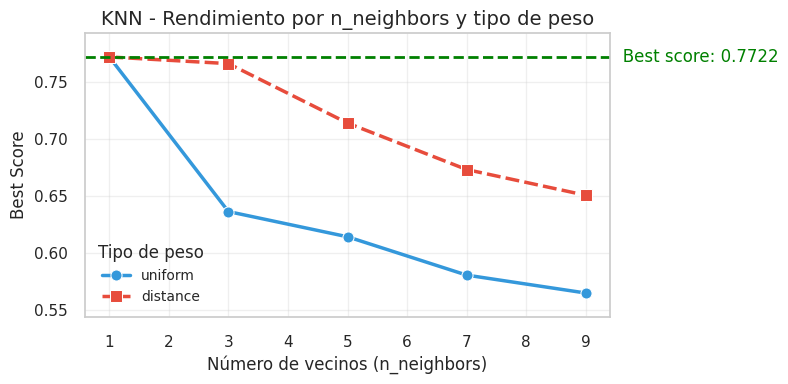

Balanced Accuracy KNN: 0.8777
Best score: 0.7721580107425279

Evaluando Árbol de Decisión con optimización de hiperparámetros...


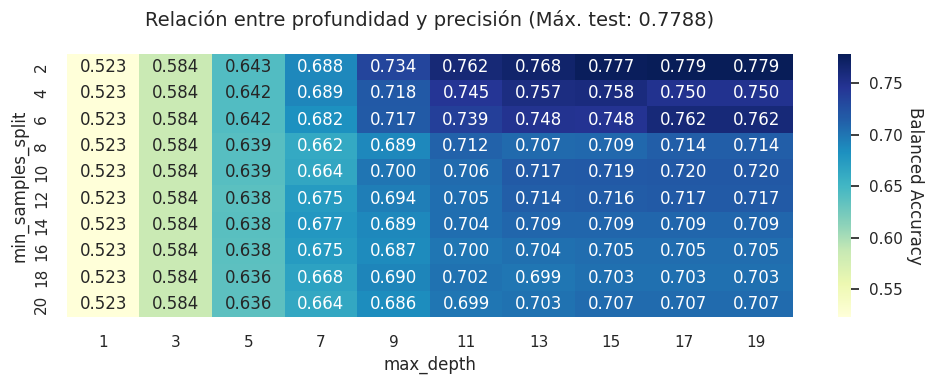

Balanced Accuracy Árbol: 0.8046
Best score: 0.7788052666852469


In [39]:
# Configuración general
plt.style.use('seaborn-v0_8')
sns.set_theme(style="whitegrid", palette="husl")

def plot_tree_heatmap(grid_search, test_accuracy):
    results = grid_search.cv_results_

    # Creamos matriz de resultados
    max_depth_values = tree_params["classifier__max_depth"]
    min_samples_split_values = tree_params["classifier__min_samples_split"]

    scores_matrix = np.zeros((len(min_samples_split_values), len(max_depth_values)))

    for i, min_samples in enumerate(min_samples_split_values):
        for j, max_depth in enumerate(max_depth_values):
            mask = (results['param_classifier__max_depth'].data == max_depth) & \
                   (results['param_classifier__min_samples_split'].data == min_samples)
            scores_matrix[i, j] = results['mean_test_score'][mask][0]

    plt.figure(figsize=(10, 4))
    # Ajustamos el vmax para incluir la precisión de test
    max_score = max(np.max(scores_matrix), test_accuracy)
    ax = sns.heatmap(scores_matrix, annot=True, fmt=".3f", cmap="YlGnBu",
                     xticklabels=max_depth_values,
                     yticklabels=min_samples_split_values,
                     vmin=np.min(scores_matrix),
                     vmax=max_score)  # Ajustar el valor máximo de la escala de colores

    plt.title(f'Relación entre profundidad y precisión (Máx. test: {test_accuracy:.4f})',
              pad=20, fontsize=14)
    plt.xlabel('max_depth', fontsize=12)
    plt.ylabel('min_samples_split', fontsize=12)
    cbar = ax.collections[0].colorbar
    cbar.set_label('Balanced Accuracy', rotation=270, labelpad=15)
    plt.tight_layout()
    plt.show()

def plot_knn_combined(grid_search, test_accuracy):
    results = grid_search.cv_results_
    df_knn = pd.DataFrame({
        'n_neighbors': results['param_classifier__n_neighbors'].data,
        'weights': results['param_classifier__weights'].data,
        'score': results['mean_test_score']
    })

    plt.figure(figsize=(8, 4))
    ax = sns.lineplot(data=df_knn, x='n_neighbors', y='score', hue='weights',
                 style='weights', markers=['o', 's'], markersize=8,
                 linewidth=2.5, palette=['#3498db', '#e74c3c'])

    # Añadimos una línea horizontal para la precisión de test
    plt.axhline(y=test_accuracy, color='green', linestyle='--', linewidth=2)
    plt.text(df_knn['n_neighbors'].max(), test_accuracy, f'       Best score: {test_accuracy:.4f}',
             verticalalignment='center', color='green')

    # Ajustamos los límites del eje Y para incluir tanto la precisión de CV como la de test
    max_cv_score = df_knn['score'].max()
    max_score = max(max_cv_score, test_accuracy)
    min_cv_score = df_knn['score'].min()
    buffer = (max_score - min_cv_score) * 0.1
    plt.ylim(min_cv_score - buffer, max_score + buffer)

    plt.title('KNN - Rendimiento por n_neighbors y tipo de peso', fontsize=14)
    plt.ylabel('Best Score', fontsize=12)
    plt.xlabel('Número de vecinos (n_neighbors)', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.legend(title='Tipo de peso', fontsize=10)
    plt.tight_layout()
    plt.show()

def evaluate_model_with_grid_search_plot(classifier, param_grid, X_train, y_train, X_test, y_test, model_name):
    pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("classifier", classifier)
    ])

    grid_search = GridSearchCV(
        pipeline,
        param_grid,
        cv=skf,
        scoring='balanced_accuracy',
        n_jobs=-1,
        error_score='raise',
        return_train_score=True
    )

    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_

    # Calculamos métricas en el conjunto de prueba
    y_pred = best_model.predict(X_test)
    bal_acc = balanced_accuracy_score(y_test, y_pred)

    # Visualizamos la precisión final
    if model_name == "Árbol de Decisión":
        plot_tree_heatmap(grid_search, grid_search.best_score_)
    elif model_name == "KNN":
        plot_knn_combined(grid_search, grid_search.best_score_)

    return bal_acc, grid_search.best_score_

print("\nEvaluando KNN con optimización de hiperparámetros...")
knn = KNeighborsClassifier()
knn_bal_acc, best_score = evaluate_model_with_grid_search_plot(
    knn, knn_params, X_train, y_train, X_test, y_test, "KNN"
)
print(f"Balanced Accuracy KNN: {knn_bal_acc:.4f}")
print(f"Best score: {best_score}")

print("\nEvaluando Árbol de Decisión con optimización de hiperparámetros...")
tree = DecisionTreeClassifier(random_state=42)
tree_bal_acc, best_score = evaluate_model_with_grid_search_plot(
    tree, tree_params, X_train, y_train, X_test, y_test, "Árbol de Decisión"
)
print(f"Balanced Accuracy Árbol: {tree_bal_acc:.4f}")
print(f"Best score: {best_score}")

Una vez visto graficamente el resultado de ambos métodos, podemos sacar algunas observaciones y conclusiones.

En el caso del modelo KNN, se observa que el método basado en la distancia es el que proporciona la mayor precisión, alcanzando un valor máximo de  0.7722.

Esto se debe a que el parámetro uniform asigna el mismo peso a todos los vecinos cercanos, mientras que distance otorga un mayor peso a aquellos que se encuentran más próximos. Por este motivo, al observar los resultados para
K=1, se advierte que ambos métodos (distance y uniform) ofrecen la misma precisión, ya que solo se considera un único vecino. Sin embargo, al incrementar K, por ejemplo a 3, la precisión del método uniform disminuye rápidamente, debido a que asigna el mismo peso a todos los vecinos, independientemente de su distancia al punto de consulta.

Asimismo, el número de vecinos considerados influye directamente en la precisión del modelo. Se evidencia que un menor número de vecinos conduce a una mayor precisión, mientras que, a medida que este número aumenta, la precisión tiende a disminuir de manera logarítmica. No obstante, aunque la precisión obtenida con K=1 sea la más alta, no sería una mala práctica optar por K=3, ya que utilizar un valor de K>1 tiende a proporcionar una mayor estabilidad y mejor capacidad de generalización en evaluaciones futuras.

En lo que respecta a los árboles de decisión, estos presentan una ligera mayor precisión en comparación con el método KNN. Pero, su tiempo de ejecución es considerablemente superior, llegando a ser hasta casi veinte veces mayor.

Al analizar el comportamiento de sus hiperparámetros, se observa que un aumento en el valor de max_depth y una disminución en el valor de min_samples_split conllevan una mejora en la precisión del modelo, alcanzando un valor máximo de 0.7788.

### AJUSTE DE HIPERPARÁMETROS 2

A continuación, se incorporará el tercer hiperparámetro tanto para el KNN como para los árboles de decisión, con el fin de evaluar su efecto en relación con los dos hiperparámetros anteriores.

In [40]:
# Definimos hiperparámetros para KNN y Árbol de Decisión
knn_params = {
    "classifier__n_neighbors": [1, 3, 5, 7, 9],
    "classifier__weights": ["uniform", "distance"],
    "classifier__algorithm": ["ball_tree", "kd_tree", "brute"],
}

tree_params = {
    "classifier__max_depth": list(range(1, 21, 2)),
    "classifier__min_samples_split": list(range(2, 21, 2)),
    "classifier__criterion": ["gini", "entropy"],
}

# Evaluamos KNN
print("\nEvaluando KNN con optimización de hiperparámetros...")

knn_time, knn_bal_acc, KNN_best_score = evaluate_model_with_grid_search(
    knn, knn_params, X_train, y_train, X_test, y_test
)
print(f"Balanced Accuracy KNN: {knn_bal_acc:.4f}")
print(f"Best score: {KNN_best_score}")
print(f"Tiempo KNN: {knn_time:.4f} segundos")

# Evaluamos el Árbol de Decisión
print("\nEvaluando Árbol de Decisión con optimización de hiperparámetros...")

tree_time, tree_bal_acc, tree_best_score = evaluate_model_with_grid_search(
    tree, tree_params, X_train, y_train, X_test, y_test
)
print(f"Balanced Accuracy Árbol: {tree_bal_acc:.4f}")
print(f"Best score: {tree_best_score}")
print(f"Tiempo Árbol: {tree_time:.4f} segundos")


Evaluando KNN con optimización de hiperparámetros...
Balanced Accuracy KNN: 0.8777
Best score: 0.7721580107425279
Tiempo KNN: 8.5832 segundos

Evaluando Árbol de Decisión con optimización de hiperparámetros...
Balanced Accuracy Árbol: 0.8046
Best score: 0.7788052666852469
Tiempo Árbol: 26.4029 segundos


Como se puede observar, ni la precisión del KNN ni la de los árboles de decisión mejoran con la introducción de estos últimos hiperparámetros. Además, el tiempo de ejecución experimenta un aumento significativo, pasando de aproximadamente 3-4 segundos en el KNN a alrededor de 8-10 segundos, lo que representa un incremento cercano al 100%. De manera similar, el tiempo de ejecución de los árboles también se ve incrementado, pasando de unos 11-12 segundos a aproximadamente 30 segundos.

Con base en los resultados obtenidos, se puede concluir que estos hiperparámetros no aportan mejoras en la precisión, pero sí incrementan significativamente el tiempo de ejecución. No obstante, se realizará un análisis gráfico para evaluar su rendimiento de manera más visual.

Para este análisis, en el caso del KNN, se fijará el número de vecinos K=1 y la métrica de pesos se establecerá como distance. En el caso de los árboles de decisión, se fijarán los valores de MaxDepth a 17 y MinSamplesSplit a 2.

### PLOTS HIPERPARÁMETROS 2

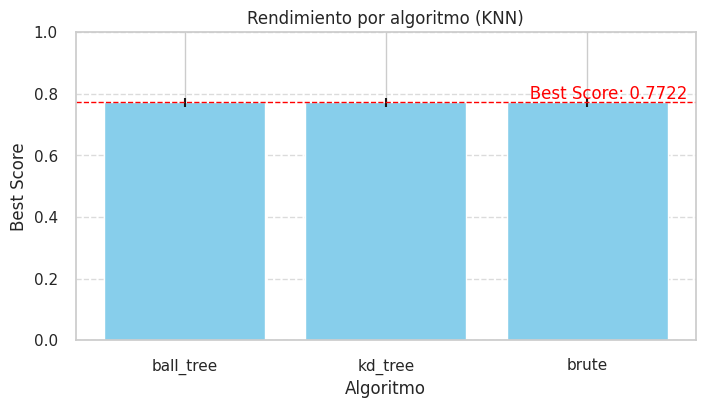

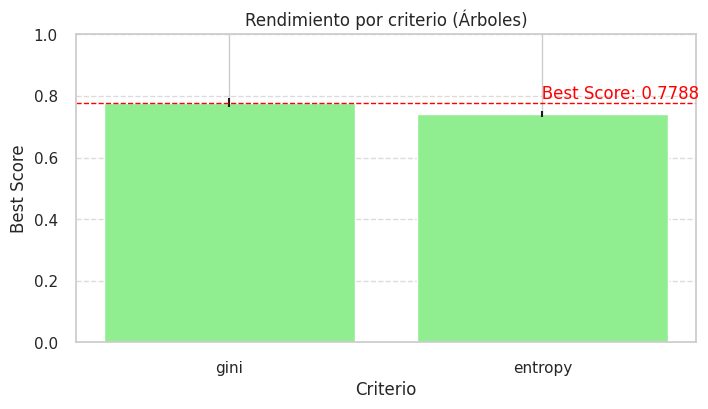

In [41]:
def evaluate_and_plot(pipeline, param_name, param_values, title, xlabel, color):
    # Configuramos la búsqueda de parámetros
    param_grid = {f"classifier__{param_name}": param_values}

    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        cv=skf,
        scoring='balanced_accuracy',
        refit=True,
        n_jobs=-1
    )

    grid_search.fit(X_train, y_train)

    # Obtenemos los resultados
    best_score = grid_search.best_score_

    # Gráfico de barras con los resultados
    plt.figure(figsize=(8, 4))
    plt.bar(
        param_values,
        [grid_search.cv_results_['mean_test_score'][i] for i in range(len(param_values))],
        yerr=[grid_search.cv_results_['std_test_score'][i] for i in range(len(param_values))],
        capsize=5,
        color=color
    )

    # Línea horizontal con el mejor score
    plt.axhline(y=best_score, color='red', linestyle='--', linewidth=1)
    plt.text(max(param_values) if isinstance(param_values[0], (int, float)) else len(param_values)-0.5,
             best_score,
             f'       Best Score: {best_score:.4f}',
             color='red',
             ha='right',
             va='bottom')

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("Best Score")
    plt.ylim(0, 1.0)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    return grid_search

pipeline_knn = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", KNeighborsClassifier(n_neighbors=1, weights='distance'))
])

pipeline_tree = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", DecisionTreeClassifier(max_depth=17, min_samples_split=2, random_state=42))
])

# Para KNN
knn_search = evaluate_and_plot(
    pipeline_knn,
    "algorithm",
    ["ball_tree", "kd_tree", "brute"],
    "Rendimiento por algoritmo (KNN)",
    "Algoritmo",
    'skyblue'
)

# Para Árboles
tree_search = evaluate_and_plot(
    pipeline_tree,
    "criterion",
    ["gini", "entropy"],
    "Rendimiento por criterio (Árboles)",
    "Criterio",
    'lightgreen'
)

## CONCLUSIONES DE KNN Y TREES


Tras evaluar ambos modelos, se observa un mejor rendimiento al utilizar el clasificador DecisionTreeClassifier. Este ofrece una mayor precisión, pero también presenta un menor coste computacional. En algunos casos, el tiempo de ejecución de KNN resulta hasta 16 veces menor en comparación con el uso de Árboles de Decisión.

En cuanto a la diferencia entre los hiperparámetros por defecto y los hiperparámetros ajustados, se evidencia una mejora significativa, especialmente en el modelo KNN. Al ejecutar KNN con su configuración predeterminada, se obtiene una precisión de 0.6143, mientras que, tras el ajuste de hiperparámetros, la precisión aumenta hasta 0.7722.

Sin embargo, este incremento en precisión viene acompañado de un aumento considerable en el tiempo de ejecución. Sin ajuste, el tiempo promedio es de aproximadamente 0.3 segundos, mientras que con los hiperparámetros ajustados, el tiempo se eleva a alrededor de 12 segundos. Lo que representa un incremento de unas 50 veces en el costo computacional.

Al incorporar el tercer hiperparámetro con el objetivo de evaluar el mejor algoritmo para la búsqueda de vecinos, se observa que la precisión no mejora, mientras que el tiempo de ejecución sí se incrementa. Este comportamiento resulta lógico, ya que dichos hiperparámetros únicamente afectan al método utilizado para localizar a los vecinos, pero no a la forma en que se calcula la distancia entre ellos. Por lo tanto, la precisión se mantiene constante al continuar utilizando el peso basado en distancia, mientras que el tiempo de ejecución aumenta debido a que los algoritmos evaluados son más lentos que el algoritmo predeterminado.

En el caso de los Árboles de Decisión, la situación es diferente. Con los hiperparámetros por defecto, la precisión obtenida es de 0.7788 y, tras realizar el ajuste de los hiperparámetros, la precisión se mantiene exactamente igual. A primera vista, este resultado resulta sorprendente, ya que, en principio, se esperaría una mejora en la precisión al ajustar los hiperparámetros. Sin embargo, al analizar más detenidamente, llegamos a la conclusión de que este comportamiento puede tener sentido.
Tal como se observa en el gráfico, una vez que el valor de MaxDepth alcanza 17, la precisión se mantiene prácticamente constante, incluso si se incrementa hasta 19. Esto sugiere que existe un umbral a partir del cual aumentar la profundidad del árbol no contribuye a mejorar el rendimiento del modelo. Por lo tanto, si los hiperparámetros por defecto ya consideran un MaxDepth de 17 o 19, es probable que, al evaluar todas las combinaciones posibles, estemos incluyendo de forma implícita dichos valores predeterminados entre las opciones consideradas. Es posible que, al incrementar considerablemente el valor de MaxDepth, se pudiera observar una mejora significativa en la precisión. Sin embargo, esto implicaría un coste computacional muy elevado, lo cual podría no justificar la ganancia obtenida en términos de rendimiento.

Además, a pesar de que no mejora la precisión, el costo computacional se incrementa de manera exponencial. El tiempo de ejecución pasa de aproximadamente 0.4 segundos a cerca de 15 segundos, lo que representa un aumento de casi 40 veces. Este elevado costo computacional obviamente no justifica la nula mejora en la precisión, haciendo que el ajuste de hiperparámetros en los Árboles de Decisión no sea eficiente en términos de rendimiento y recursos.

Al incorporar el tercer hiperparámetro, se observa que la precisión del modelo no mejora. Esto se debe a que, al introducir el criterio de división (criterion) con las opciones gini y entropy, el modelo ya utiliza gini como criterio por defecto, y entropy no aporta una mejora significativa en el rendimiento. Por lo tanto, como era de esperarse, la precisión se mantiene sin variaciones.

### COMPARACIÓN CON MODELOS DUMMY

Por último, se comparará la precisión del mejor modelo obtenido con la de un modelo dummy. Los modelos dummy son soluciones simples e ingenuas que sirven como referencia base para evaluar el desempeño de modelos más complejos.

Si la precisión del modelo dummy es similar a la de nuestro modelo entrenado, esto indicaría una inconsistencia, ya que significaría que el modelo avanzado no aporta una mejora significativa sobre una estrategia básica. Esta comparación es fundamental para garantizar que el modelo seleccionado realmente añade valor y no simplemente reproduce patrones aleatorios o triviales.

In [42]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X_train, y_train)
y_pred = dummy.predict(X_test)

bal_acc = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy KNN: {bal_acc:.4f}")

Balanced Accuracy KNN: 0.5000


In [43]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy="stratified")
dummy.fit(X_train, y_train)
y_pred = dummy.predict(X_test)

bal_acc = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy KNN: {bal_acc:.4f}")

Balanced Accuracy KNN: 0.5172


In [44]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy="uniform")
dummy.fit(X_train, y_train)
y_pred = dummy.predict(X_test)

bal_acc = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy KNN: {bal_acc:.4f}")

Balanced Accuracy KNN: 0.5504


Como se puede observar en los tres bloques de código previos, el modelo dummy con mayor precisión es el stratified, que alcanza un 0.5053. Este valor está claramente distante de la precisión máxima de nuestro modelo, que es de 0.7788.

Dado que la precisión de nuestro modelo entrenado es significativamente mayor que la del modelo dummy, podemos concluir que nuestro modelo es acertado y preciso, mostrando un rendimiento superior al de una solución simple e ingenua.

# AVANZADOS: MODELOS LINEALES Y SVMS

A continuación, se evaluarán modelos lineales y Máquinas de Vectores de Soporte (SVM) para determinar cuál de ellos proporciona una mayor precisión, y así comparar su rendimiento con el de nuestro mejor modelo hasta el momento, los Árboles de decisión.

## HIPERPARAMETROS POR DEFECTO


Al igual que se hizo previamente con el KNN y los Árboles de decisión, primero evaluaremos el comportamiento de los modelos lineales y las Máquinas de Vectores de Soporte (SVM) utilizando los hiperparámetros por defecto, con el fin de identificar cuál ofrece el mejor rendimiento. Posteriormente, procederemos a optimizar sus hiperparámetros para intentar mejorar su desempeño.

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Definimos los clasificadores
logreg = LogisticRegression()
logreg_l1 = LogisticRegression(penalty='l1', solver='liblinear')
svc = SVC()

# Pipeline final
pipeline_logreg = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", logreg)
])

pipeline_logreg_l1 = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", logreg_l1)
])

pipeline_svc = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", svc)
])


# Evaluamos la Regresión Logística por defecto
print("Evaluando Regresión Logística con hiperparámetros por defecto")
start_time = time.time()
logreg_default = cross_val_score(pipeline_logreg, X_train, y_train, cv=skf, scoring="balanced_accuracy")
elapsed_time = time.time() - start_time
print(f"Balanced Accuracy: {np.mean(logreg_default):.4f}")
print(f"Tiempo de entrenamiento: {elapsed_time:.4f} segundos\n")

# Mostramos los parámetros por defecto usados
print("Parámetros por defecto usados:")
print(logreg.get_params())
print("\n")


# Evaluamos la Regresión Logística con regulación L1 por defecto
print("Evaluando Regresión Logística L1 con hiperparámetros por defecto")
start_time = time.time()
logreg_l1_default = cross_val_score(pipeline_logreg_l1, X_train, y_train, cv=skf, scoring="balanced_accuracy")
elapsed_time = time.time() - start_time
print(f"Balanced Accuracy: {np.mean(logreg_l1_default):.4f}")
print(f"Tiempo de entrenamiento: {elapsed_time:.4f} segundos\n")

# Mostramos los parámetros por defecto usados
print("Parámetros por defecto usados:")
print(logreg_l1.get_params())
print("\n")


# Evaluamos el SVC por defecto
print("Evaluando SVC con hiperparámetros por defecto")
start_time = time.time()
svc_default = cross_val_score(pipeline_svc, X_train, y_train, cv=skf, scoring="balanced_accuracy")
elapsed_time = time.time() - start_time
print(f"Balanced Accuracy: {np.mean(svc_default):.4f}")
print(f"Tiempo de entrenamiento: {elapsed_time:.4f} segundos")

# Mostramos los parámetros por defecto usados
print("Parámetros por defecto usados:")
print(svc.get_params())
print("\n")

Evaluando Regresión Logística con hiperparámetros por defecto
Balanced Accuracy: 0.6007
Tiempo de entrenamiento: 0.1759 segundos

Parámetros por defecto usados:
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


Evaluando Regresión Logística L1 con hiperparámetros por defecto
Balanced Accuracy: 0.6028
Tiempo de entrenamiento: 0.1637 segundos

Parámetros por defecto usados:
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l1', 'random_state': None, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


Evaluando SVC con hiperparámetros por defecto
Balanced Accuracy: 0.5633
Tiempo de entrenamiento: 0.35

Como se puede observar, los tres modelos presentan un tiempo de ejecución muy bajo, en el orden de unas décimas de segundo. La regresión logística estandar (L2 por defecto),  evita el sobreajuste penalizando coeficientes grandes, pero muestra un rendimiento relativamente bajo, siendo de 0.6007. Por otro lado, la regularización L1 genera modelos más interpretables al forzar coeficientes cero, pero no mejora significativamente la precisión. Por último, podemos ver que las Máquinas de Vectores de Soporte (SVM) sin hiperparámetros tienen una precisión escasa de 0.5633.

## AJUSTE DE HIPERPARAMETROS

A continuación, se ajustarán los hiperparámetros tanto de los modelos lineales como de las SVMs.

Para el LogisticRegression por defecto hemos elegido los siguientes hiperparámetros:

*   C (Fuerza de la regularización)
*   Tipo de Solver


Para el LogisticRegression con regulación l1 hemos elegido los siguientes hiperparámetros:

*   C (Fuerza de la regularización)
*   Penalty
*   Tipo de Solver

Cabe destacar que el tipo de solver en modelo lineal con regulacion L1 no permite el solver lbfgs debido a que es un algoritmo de optimización basado en gradientes suaves y la regularización L1 introduce una función de penalización no diferenciable en cero. Esta falta de "suavidad" hace que lbfgs no pueda manejarla bien.


Para las SVMs hemos elegido los siguientes hiperparámetros:

*   C (Penalización)
*   Tipo de kernel



In [46]:
# Definimos los hiperparámetros para Regresión Logística y SVR

logreg_params = {
    "classifier__C": [0.01, 0.1, 1, 10, 100],
    "classifier__solver": ["liblinear", "lbfgs"],
}

logreg_l1_params = {
    "classifier__C": [0.01, 0.1, 1, 10, 100],
     "classifier__penalty": ["l1"],
    "classifier__solver": ["liblinear"],
}

svc_params = {
    "classifier__C": [0.1, 1, 10, 100],
    "classifier__kernel": ["linear", "rbf", "poly"],
}

def evaluate_model_with_grid_search_best_model(classifier, param_grid, X_train, y_train, X_test, y_test):
    pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("classifier", classifier)
    ])

    # GridSearchCV con cross-validation
    grid_search = GridSearchCV(
        pipeline,
        param_grid,
        cv=skf,
        scoring='balanced_accuracy',
        n_jobs=-1,
        error_score='raise'
    )

    start_time = time.time()
    grid_search.fit(X_train, y_train)
    elapsed_time = time.time() - start_time

    best_model = grid_search.best_estimator_

    # Calculamos las métricas en el conjunto de prueba
    y_pred = best_model.predict(X_test)
    bal_acc = balanced_accuracy_score(y_test, y_pred)

    return elapsed_time, bal_acc, grid_search.best_score_, grid_search.best_estimator_

# Evaluamos la Regresión Logística sin regulación
print("\nEvaluando Regresión Logística con optimización de hiperparámetros...")

logreg_time, logreg_bal_acc, logreg_best_score = evaluate_model_with_grid_search(
    logreg, logreg_params, X_train, y_train, X_test, y_test
)
print(f"Balanced Accuracy LogReg: {logreg_bal_acc:.4f}")
print(f"Best score: {logreg_best_score:.4f}")
print(f"Tiempo LogReg: {logreg_time:.4f} segundos")

# Evaluamos la Regresión Logística con regulación L1
print("\nEvaluando Regresión Logística L1 con optimización de hiperparámetros...")

logreg_time_l1, logreg_bal_acc_l1, logreg_best_score_l1 = evaluate_model_with_grid_search(
    logreg_l1, logreg_l1_params, X_train, y_train, X_test, y_test
)
print(f"Balanced Accuracy LogReg: {logreg_bal_acc_l1:.4f}")
print(f"Best score: {logreg_best_score_l1:.4f}")
print(f"Tiempo LogReg: {logreg_time_l1:.4f} segundos")

# Evaluamos el SVR
print("\nEvaluando SVR con optimización de hiperparámetros...")

svc_time, svc_bal_acc, svc_best_score, svc_best_model = evaluate_model_with_grid_search_best_model(
    svc, svc_params, X_train, y_train, X_test, y_test
)
print(f"Balanced Accuracy SVR: {svc_bal_acc:.4f}")
print(f"Best score: {svc_best_score:.4f}")
print(f"Tiempo SVR: {svc_time:.4f} segundos")


Evaluando Regresión Logística con optimización de hiperparámetros...
Balanced Accuracy LogReg: 0.5845
Best score: 0.6167
Tiempo LogReg: 1.1859 segundos

Evaluando Regresión Logística L1 con optimización de hiperparámetros...
Balanced Accuracy LogReg: 0.5845
Best score: 0.6179
Tiempo LogReg: 0.8092 segundos

Evaluando SVR con optimización de hiperparámetros...
Balanced Accuracy SVR: 0.8952
Best score: 0.7965
Tiempo SVR: 7.8413 segundos


Incluso después de los ajustes, los modelos lineales parecen ser ineficaces para este determinado conjunto de datos, con precisiones de 0.6167 y 0.6179, mucho menores de las que presentaban KNN o los Árboles de decisión. Por otro lado, las Máquinas de vectores de soporte alcanzó 0.7965 de precisión, superando incluso a los árboles de decisión (0.7788). Este aumento de precisión genera un disparo del timepo en el que tarda el modelo, que anteriormente era de pocas decimas y ahora asciende hasta casi unos 8 segundos.

A continuación y como hemos hecho todo el tiempo hasta ahora, le daremos un enforque gráfico a estos datos.

## PLOTS SVM Y MODELOS LINEALES

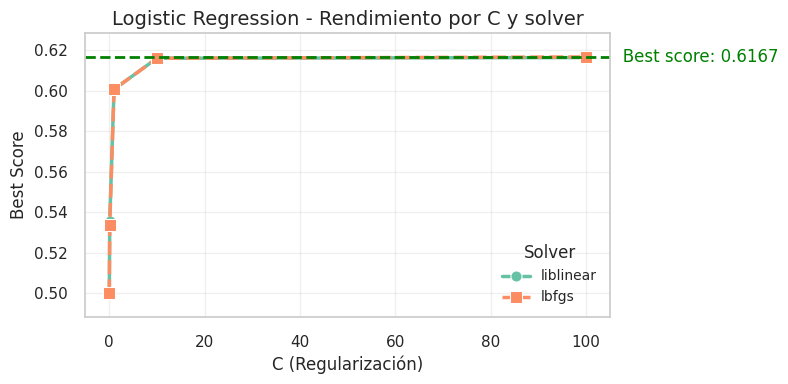

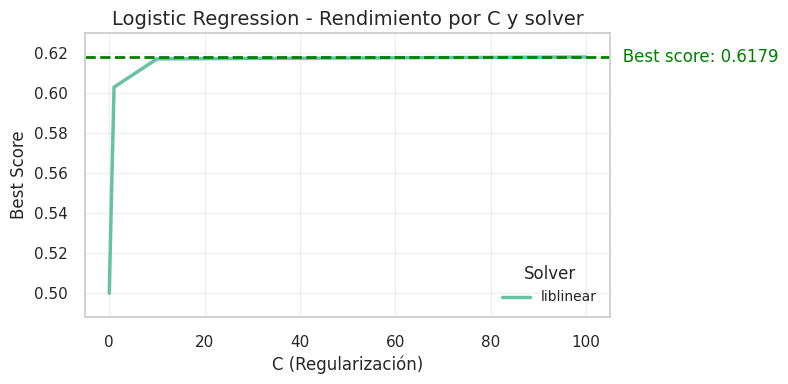

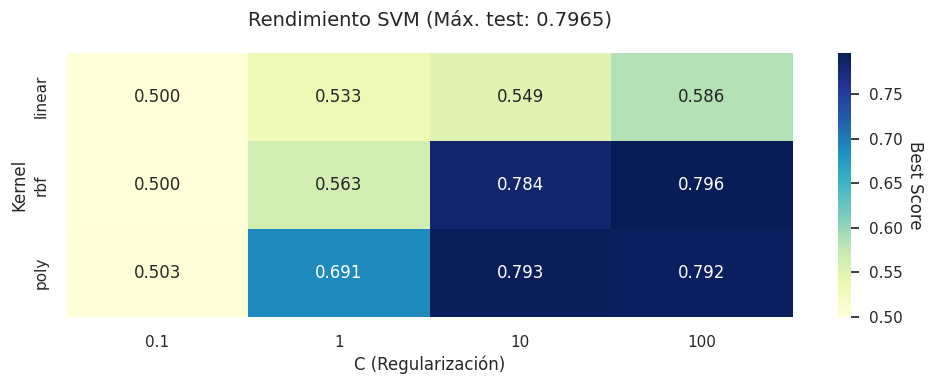

In [47]:
def plot_logreg_C(grid_search, test_accuracy):
    results = grid_search.cv_results_

    df_logreg = pd.DataFrame({
        'C': results['param_classifier__C'].data,
        'solver': results['param_classifier__solver'].data,
        'score': results['mean_test_score']
    })

    plt.figure(figsize=(8, 4))

    unique_solvers = df_logreg['solver'].unique()

    if len(unique_solvers) > 1:
        ax = sns.lineplot(data=df_logreg, x='C', y='score', hue='solver',
                          style='solver', markers=['o', 's'], markersize=8,
                          linewidth=2.5, palette='Set2')
    else:
        ax = sns.lineplot(data=df_logreg, x='C', y='score', hue='solver',
                          linewidth=2.5, palette='Set2')

    # Línea horizontal con el score en test
    plt.axhline(y=test_accuracy, color='green', linestyle='--', linewidth=2)
    plt.text(df_logreg['C'].max(), test_accuracy, f'       Best score: {test_accuracy:.4f}',
             verticalalignment='center', color='green')

    # Ajustes del eje Y
    max_cv_score = df_logreg['score'].max()
    min_cv_score = df_logreg['score'].min()
    buffer = (max_cv_score - min_cv_score) * 0.1
    plt.ylim(min_cv_score - buffer, max_cv_score + buffer)

    plt.title('Logistic Regression - Rendimiento por C y solver', fontsize=14)
    plt.xlabel('C (Regularización)', fontsize=12)
    plt.ylabel('Best Score', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.legend(title='Solver', fontsize=10)
    plt.tight_layout()
    plt.show()


def plot_svm_heatmap(grid_search, test_accuracy):
    results = grid_search.cv_results_

    # Parámetros utilizados
    C_values = [0.1, 1, 10, 100]
    kernel_values = ["linear", "rbf", "poly"]

    # Creamos matriz de resultados
    scores_matrix = np.zeros((len(kernel_values), len(C_values)))

    for i, kernel in enumerate(kernel_values):
        for j, C in enumerate(C_values):
            mask = (results['param_classifier__C'].data == C) & \
                   (results['param_classifier__kernel'].data == kernel)
            scores_matrix[i, j] = results['mean_test_score'][mask][0]

    # Plot
    plt.figure(figsize=(10, 4))
    max_score = max(np.max(scores_matrix), test_accuracy)

    ax = sns.heatmap(scores_matrix, annot=True, fmt=".3f", cmap="YlGnBu",
                     xticklabels=C_values, yticklabels=kernel_values,
                     vmin=np.min(scores_matrix), vmax=max_score)

    plt.title(f'Rendimiento SVM (Máx. test: {test_accuracy:.4f})', pad=20, fontsize=14)
    plt.xlabel('C (Regularización)', fontsize=12)
    plt.ylabel('Kernel', fontsize=12)

    cbar = ax.collections[0].colorbar
    cbar.set_label('Best Score', rotation=270, labelpad=15)
    plt.tight_layout()
    plt.show()

def evaluate_model_with_grid_search_plot(classifier, param_grid, X_train, y_train, X_test, y_test, model_name):
    pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("classifier", classifier)
    ])

    grid_search = GridSearchCV(
        pipeline,
        param_grid,
        cv=skf,
        scoring='balanced_accuracy',
        n_jobs=-1,
        error_score='raise',
        return_train_score=True
    )

    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_

    # Calculamos métricas en el conjunto de prueba
    y_pred = best_model.predict(X_test)
    bal_acc = balanced_accuracy_score(y_test, y_pred)

    # Visualizamos la precisión final
    if model_name == "Logistic Regression":
        plot_logreg_C(grid_search, grid_search.best_score_)
    elif model_name == "Logistic Regression L1":
        plot_logreg_C(grid_search, grid_search.best_score_)
    elif model_name == "SVMs":
        plot_svm_heatmap(grid_search, grid_search.best_score_)

    return bal_acc, grid_search.best_score_



LogReg_bal_acc, best_score = evaluate_model_with_grid_search_plot(
    logreg, logreg_params, X_train, y_train, X_test, y_test, "Logistic Regression"
)

print("")

LogReg_bal_l1_acc, best_score = evaluate_model_with_grid_search_plot(
    logreg_l1, logreg_l1_params, X_train, y_train, X_test, y_test, "Logistic Regression L1"
)

print("")

svm_bal_acc, best_score = evaluate_model_with_grid_search_plot(
    svc, svc_params, X_train, y_train, X_test, y_test, "SVMs"
)

En la primera gráfica, titulada “Logistic Regression - Rendimiento por C y Solver”, se presenta una comparación entre los solvers 'liblinear' y 'lbfgs', evaluados para distintos valores del parámetro de regularización C. Ambos algoritmos muestran un comportamiento similar: el rendimiento mejora rápidamente conforme C incrementa desde valores bajos hasta alcanzar un punto de estabilización en torno a C = 10. A partir de este valor, las ganancias en rendimiento se vuelven muy reducidas. El mejor desempeño registrado en esta gráfica corresponde a una puntuación de 0.6167, indicada mediante una línea verde punteada horizontal.

Esta evolución del rendimiento se justifica por la función que cumple el parámetro C en la regresión logística. Valores muy bajos de C imponen una regularización elevada, lo que restringe la complejidad del modelo y le impide capturar patrones relevantes. A medida que se incrementa C, la penalización disminuye, otorgando al modelo una mayor flexibilidad. Sin embargo, una vez alcanzado cierto umbral, continuar aumentando C no conlleva beneficios adicionales, lo cual indica que el modelo ya ha alcanzado su capacidad explicativa máxima para este conjunto de datos.

La segunda gráfica también corresponde a regresión logística, pero en este caso se ha utilizado exclusivamente el solver 'liblinear', compatible con la regularización L1, según se deduce del código empleado. Se observa un patrón de comportamiento similar al de la primera gráfica: un incremento rápido en la puntuación a medida que C aumenta, seguido de una estabilización en torno a C = 10. No obstante, el rendimiento máximo en este caso es ligeramente superior, alcanzando un 0.6179.

Esta ligera mejora puede atribuirse a las propiedades de la regularización L1, la cual tiende a generar modelos más sparse, es decir, con una mayor proporción de coeficientes iguales a cero. Este comportamiento favorece la eliminación automática de variables irrelevantes, lo que puede traducirse en un modelo más eficiente y con mejor capacidad de generalización, particularmente en escenarios donde solo algunas variables son verdaderamente informativas.

Por último, la tercera gráfica presenta un mapa de calor correspondiente al rendimiento de SVM bajo distintas combinaciones de kernels (linear, rbf, poly) y valores de C. En este caso, se obtiene un rendimiento significativamente superior al de la regresión logística, con un máximo de 0.7965. Las mejores configuraciones se observan para el kernel 'rbf' con C = 100 (score = 0.796) y para el kernel 'poly' con C = 10 (score = 0.793).

Este aumento en rendimiento puede explicarse por la capacidad de los kernels no lineales para transformar implícitamente el espacio de características, permitiendo a SVM modelar fronteras de decisión no lineales. A diferencia de la regresión logística, que se limita a separar los datos mediante hiperplanos lineales, los kernels como rbf y poly permiten capturar relaciones más complejas entre las variables predictoras.

Es particularmente relevante observar que, con kernels no lineales, el incremento en C conlleva mejoras más marcadas en el rendimiento, en comparación con el kernel lineal. Esto se debe a que los modelos más complejos se benefician en mayor medida de una regularización reducida, ya que pueden aprovechar su flexibilidad para representar mejor la estructura subyacente de los datos.

En conjunto, el contraste entre los resultados obtenidos con regresión logística y SVM sugiere que los datos presentan una estructura no lineal significativa, que solo puede ser modelada de forma eficaz mediante algoritmos más flexibles como SVM con kernels no lineales.

## ANÁLISIS DE ATRIBUTOS MÁS Y MENOS RELEVANTES

Gracias a la aplicación de regresión logística con regularización L1, es posible identificar de manera objetiva cuáles variables tienen una influencia significativa en la predicción del comportamiento de los empleados en relación con su permanencia o renuncia en la empresa. La regularización L1 tiene la propiedad de imponer una penalización que reduce a cero los coeficientes de aquellas variables que no aportan valor predictivo al modelo. En otras palabras, si una característica no contribuye de forma significativa a mejorar la capacidad del modelo para clasificar correctamente los casos, su coeficiente es eliminado, lo que equivale a su exclusión efectiva del modelo.

Este proceso no solo mejora la interpretabilidad del modelo, sino que también actúa como una herramienta automática de selección de variables, destacando únicamente aquellas que tienen un peso real en la toma de decisiones del algoritmo.

En esta sección, se procederá a mostrar las 10 variables que mayor influencia tienen en la predicción, es decir, aquellas que más contribuyen a determinar si un trabajador tiene mayor probabilidad de abandonar la empresa o de permanecer en ella. Asimismo, se identificarán todas aquellas variables cuyo coeficiente ha sido reducido a cero, lo que indica que no tienen impacto alguno en el resultado de la predicción, y por tanto, no afectan el desempeño del modelo ni ofrecen información relevante para la clasificación.

In [48]:
# Entrenamos el pipeline
pipeline_logreg_l1.fit(X_train, y_train)

# Obtenemos los nombres de las variables transformadas
feature_names = pipeline_logreg_l1.named_steps["preprocessor"].get_feature_names_out()

# Obtenemos los coeficientes del modelo
coefs = pipeline_logreg_l1.named_steps["classifier"].coef_[0]

# Creamos un DataFrame con la información
coef_df = pd.DataFrame({
    "columna": feature_names,
    "importancia": coefs,
    "abs_importance": np.abs(coefs)
})

# Ordenamos por importancia absoluta
coef_df_sorted = coef_df.sort_values("abs_importance", ascending=False)

# Top 10 más importantes
mejores_10 = coef_df_sorted.head(10)

# Top 10 menos importantes
peores_10 = coef_df_sorted[coef_df_sorted["abs_importance"] > 0].tail(10)

# Columnas que no contribuyen nada
peores = coef_df_sorted[coef_df_sorted["abs_importance"] == 0]

# Imprimimos
print("Top 10 más importantes:")
print(mejores_10[["columna", "importancia"]])

print("Top 10 menos importantes:")
print(peores_10[["columna", "importancia"]])

print("\Menos significativos (= 0):")
print(peores[["columna", "importancia"]])

Top 10 más importantes:
                                columna  importancia
18               num__TotalWorkingYears    -2.724039
0                              num__hrs     2.281409
22            num__YearsWithCurrManager    -2.078504
21         num__YearsSinceLastPromotion     1.773589
29  cat__EducationField_Human Resources     1.640925
5                  num__JobSatisfaction    -1.215348
14              num__NumCompaniesWorked     1.060588
6                  num__WorkLifeBalance    -0.961119
7                              num__Age    -0.955765
4          num__EnvironmentSatisfaction    -0.926033
Top 10 menos importantes:
                                   columna  importancia
9                           num__Education    -0.141388
11                         num__EmployeeID     0.083111
8                    num__DistanceFromHome    -0.081675
26         cat__Department_Human Resources     0.081148
12                           num__JobLevel    -0.050133
35                      cat__Ge

Como se ha podido comprobar durante el análisis, algunas variables del conjunto de datos no presentan una contribución significativa al momento de predecir si un empleado permanecerá en la organización o decidirá abandonarla. Este comportamiento observado concuerda con estudios preliminares realizados sobre las características de ciertas columnas, las cuales se identificaron como variables constantes. Entre estas destacan: EmployeeCount, cuyo valor es constante e igual a 1 en todos los registros; Over18, que presenta únicamente el valor “Yes”; y StandardHours, que se mantiene fija en 8 para todos los empleados.

Dado que estas columnas no muestran variabilidad entre las observaciones, no permiten al modelo distinguir patrones ni diferenciar comportamientos entre distintos tipos de empleados. En otras palabras, tanto los trabajadores que se quedan como aquellos que se van comparten exactamente el mismo valor en estas variables, lo que implica que su presencia no añade información relevante al proceso de aprendizaje del modelo.

En resumen, estas características, como el resto de esta lista, no aportan valor predictivo, ya que no se observa una diferencia significativa en la conducta laboral de los empleados en función de dichas variables. Por tanto, es apropiado descartarlas durante el preprocesamiento de los datos, evitando así introducir ruido innecesario o complejidad redundante en el modelo entrenado.

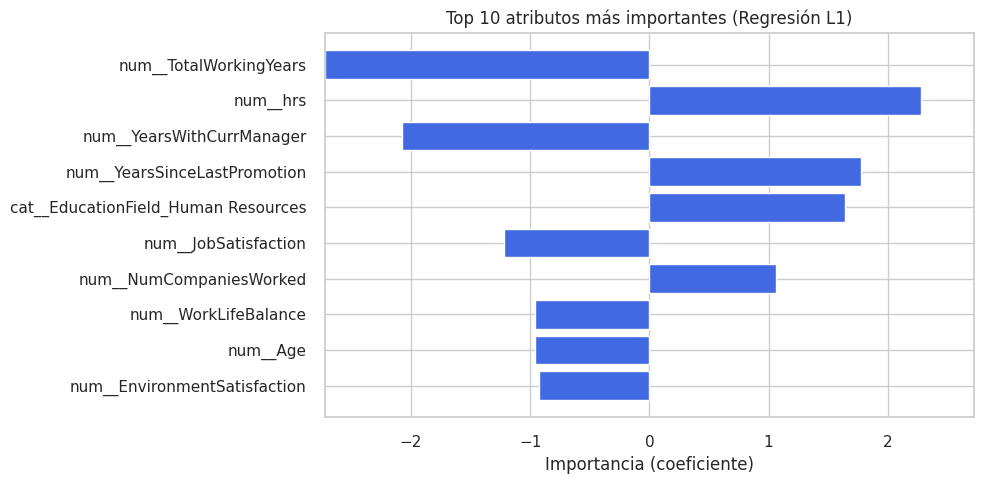

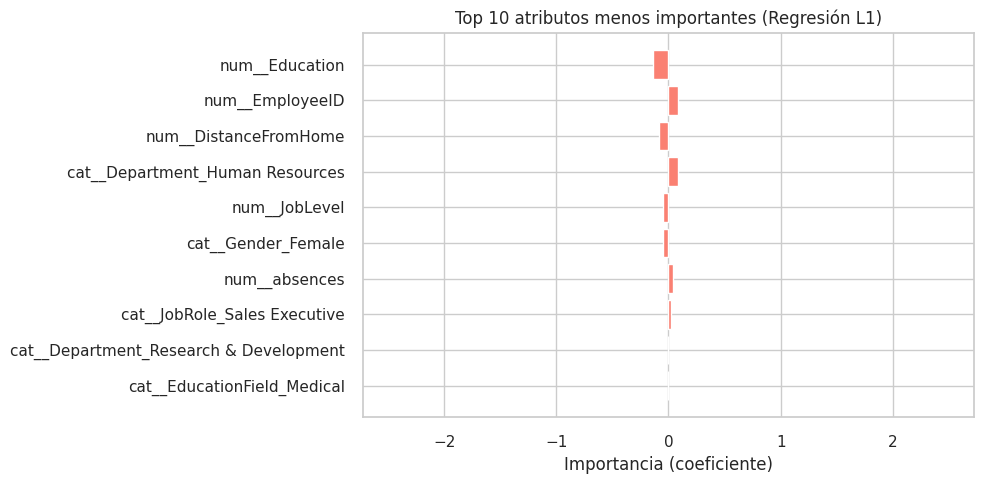

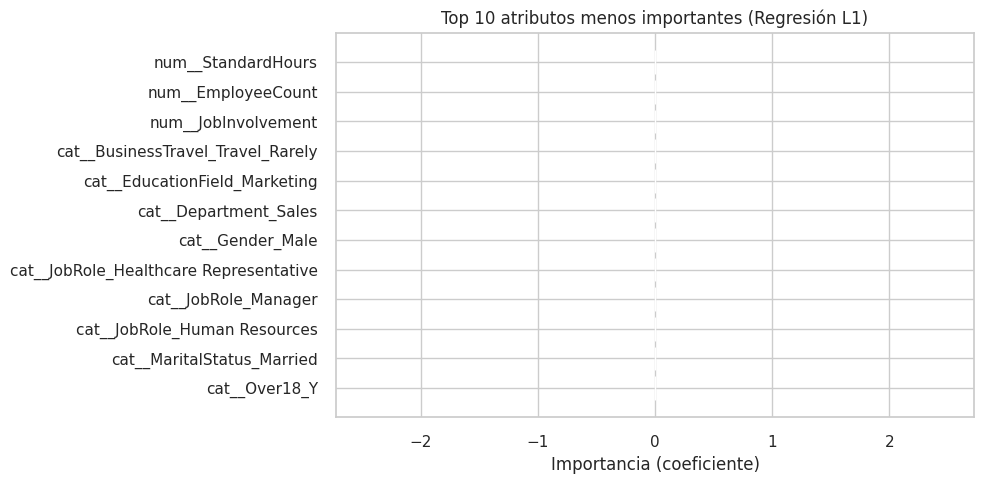

In [49]:
# Calculamos el límite máximo absoluto para la escala común
xlim = max(abs(mejores_10["importancia"]).max(), abs(peores_10["importancia"]).max())

# Top 10 más importantes
plt.figure(figsize=(10, 5))
plt.barh(mejores_10["columna"], mejores_10["importancia"], color="royalblue")
plt.xlabel("Importancia (coeficiente)")
plt.title("Top 10 atributos más importantes (Regresión L1)")
plt.xlim(-xlim, xlim)
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()

print("")

plt.figure(figsize=(10, 5))
plt.barh(peores_10["columna"], peores_10["importancia"], color="salmon")
plt.xlabel("Importancia (coeficiente)")
plt.title("Top 10 atributos menos importantes (Regresión L1)")
plt.xlim(-xlim, xlim)
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()

print("")

# Menos importantes != 0
plt.figure(figsize=(10, 5))
plt.barh(peores["columna"], peores["importancia"], color="salmon")
plt.xlabel("Importancia (coeficiente)")
plt.title("Top 10 atributos menos importantes (Regresión L1)")
plt.xlim(-xlim, xlim)
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()

La representación gráfica de los coeficientes obtenidos a partir de la regresión logística con regularización L1 permite visualizar de forma más intuitiva y comprensible las diferencias en la relevancia de cada variable dentro del modelo predictivo. A través de estos gráficos, se puede apreciar con mayor claridad cuáles son las variables que más influyen en la decisión del modelo y en qué dirección lo hacen.

En particular, es posible distinguir si el efecto de una determinada variable sobre la predicción es positivo —es decir, si incrementa la probabilidad de que el empleado permanezca en la empresa— o negativo, lo que indicaría una mayor probabilidad de que el trabajador decida marcharse. La magnitud del coeficiente refleja el grado de influencia que tiene cada variable, mientras que el signo (positivo o negativo) señala la dirección del efecto.

# RESULTADOS Y MODELO FINAL

Como recapitulación, hemos entrenado y evaluado el desempeño de cuatro familias de modelos de clasificación: KNN, Árboles de Decisión, Modelos Lineales (con y sin regularización L1) y Máquinas de Vectores de Soporte (SVM). A continuación, presentamos un análisis comparativo no solo en términos de precisión, sino también del tiempo de ejecución y de la capacidad de cada modelo para capturar patrones relevantes en los datos.

El modelo SVM se posicionó como el mejor clasificador en términos de precisión, alcanzando un 0.7965 con un tiempo de ejecución relativamente moderado de 8 segundos. Esto sugiere que las SVMs lograron encontrar un buen equilibrio entre la complejidad del modelo y su capacidad de generalización, posiblemente debido a su habilidad para construir márgenes óptimos incluso en espacios de alta dimensionalidad.

En segundo lugar, encontramos al modelo de Árboles de Decisión, con una precisión de 0.7788 y un tiempo de 25 segundos. Aunque su precisión fue ligeramente menor que la de las SVMs, su principal ventaja radica en la interpretabilidad. Los árboles permiten visualizar las decisiones, identificar reglas claras y entender el impacto de cada variable, lo cual es muy valioso en entornos donde la transparencia del modelo es importante.

El modelo KNN (K-Nearest Neighbors) obtuvo una precisión de 0.7722, con un tiempo de ejecución de 8 segundos. Aunque su desempeño es razonable, KNN tiene ciertas limitaciones: es sensible a la escala de los datos, requiere mucho espacio de almacenamiento y puede ser costoso en tiempo de predicción para conjuntos de datos grandes. Sin embargo, su simplicidad lo convierte en un buen punto de partida o modelo base.

Por otro lado, los modelos lineales tuvieron un rendimiento considerablemente más bajo. La regresión logística estándar alcanzó una precisión de 0.6167, mientras que la versión con restricción L1 apenas mejoró con un 0.6179, ambos con tiempos de ejecución muy bajos (menos de 1 segundo). Aunque estos modelos no destacaron por su precisión, el modelo con L1 ofrece una ventaja interesante: permite identificar qué variables son realmente importantes. Las variables con coeficientes iguales a cero en la regresión L1 indican que los empleados con o sin esa característica tienen comportamientos similares respecto a la permanencia o abandono, y por tanto, esas variables no aportan valor predictivo. Este proceso de selección automática de características es especialmente útil en contextos con muchos predictores o cuando se busca un modelo simple y explicativo.

En resumen, y considerando los resultados obtenidos a lo largo del análisis, así como los argumentos previamente expuestos en relación con la precisión, el tiempo de ejecución y la capacidad de generalización de los modelos evaluados, se ha determinado que el modelo más adecuado para nuestro problema es el de Máquinas de Vectores de Soporte (SVM). Este modelo no solo obtuvo la mayor precisión entre todos los modelos comparados, sino que también logró un equilibrio adecuado entre rendimiento computacional y capacidad predictiva.

A continuación, se detallan los parámetros del modelo final seleccionado, correspondientes a la mejor configuración obtenida durante el proceso de ajuste y validación:

In [50]:
print(f"Best SVR estimator: {svc_best_model}")

Best SVR estimator: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputation',
                                                                   SimpleImputer()),
                                                                  ('scaling',
                                                                   MinMaxScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7c484b5c2750>),
                                                 ('cat',
                                                  Pipeline(steps=[('imputation',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoding',
                                                                   OneHotEncoder(handle_unknown='i

Sabiendo estos hiperparametros se procedió a entrenar el modelo definitivo utilizando la totalidad del conjunto de datos disponible. Esta etapa tiene como objetivo aprovechar al máximo la información contenida en los datos para construir un modelo robusto y generalizable.

Al entrenar el modelo final con todos los datos, se busca obtener una versión definitiva lista para ser evaluada en nuevos escenarios o implementada en producción.

In [51]:
import joblib

pipeline_svc = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", SVC(C=100))
])

pipeline_svc.fit(X, y)
joblib.dump(pipeline_svc, 'modelo_final.pkl')

['modelo_final.pkl']

# TAREA DE ELECCIÓN ABIERTA: RAMDOM FOREST

En esta sección, se implementa y evalúa un modelo de Random Forest como tarea adicional. El objetivo es comparar su rendimiento tanto en su configuración por defecto como tras un proceso de ajuste de hiperparámetros, utilizando el mismo flujo de preprocesamiento aplicado a los modelos anteriores.

## HIPERPARÁMETROS POR DEFECTO

In [52]:
from sklearn.ensemble import RandomForestClassifier

# Definimos el clasificador Random Forest
rf = RandomForestClassifier(random_state=42)

# Pipeline final
pipeline_rf = Pipeline([
    ("preprocessor", preprocessor),  # Usando el mismo preprocesador que ya tenías
    ("classifier", rf)
])

# Evaluamos el Random Forest por defecto
print("Evaluando Random Forest con hiperparámetros por defecto")
start_time = time.time()
rf_default = cross_val_score(pipeline_rf, X_train, y_train, cv=skf, scoring="balanced_accuracy")
elapsed_time = time.time() - start_time

print(f"Balanced Accuracy: {np.mean(rf_default):.4f}")
print(f"Tiempo de entrenamiento: {elapsed_time:.4f} segundos\n")

# Mostramos los parámetros por defecto usados
print("Parámetros por defecto usados:")
print(rf.get_params())

Evaluando Random Forest con hiperparámetros por defecto
Balanced Accuracy: 0.7466
Tiempo de entrenamiento: 1.2667 segundos

Parámetros por defecto usados:
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


## AJUSTE DE HIPERPARÁMETROS


Posteriormente, se llevó a cabo un proceso de optimización de hiperparámetros con el fin de mejorar el rendimiento del modelo. Para ello, se definió una malla (rf_params) que incluye variaciones en:


*   N_estimators: El número de árboles del bosque
*   Max_depth: La profundidad máxima del árbol
*   Min_samples_split: El número mínimo de muestras necesarias para dividir un nodo
*   Max_features: El método de selección de características


In [53]:
from sklearn.ensemble import RandomForestClassifier

# Definimos los parámetros para Random Forest
rf_params = {
    "classifier__n_estimators": [100, 200],
    "classifier__max_depth": [None, 10, 20],
    "classifier__min_samples_split": [2, 5],
    "classifier__max_features": ['sqrt', 'log2'],
}

# Creamos el modelo Random Forest
rf = RandomForestClassifier(random_state=42)

# Evaluamos el Random Forest con optimización de hiperparámetros
print("\nEvaluando Random Forest con optimización de hiperparámetros...")

rf_time, rf_bal_acc, rf_best_score = evaluate_model_with_grid_search(
    rf, rf_params, X_train, y_train, X_test, y_test
)

print(f"Balanced Accuracy Random Forest: {rf_bal_acc:.4f}")
print(f"Best Score: {rf_best_score:.4f}")
print(f"Tiempo Random Forest: {rf_time:.4f} segundos")


Evaluando Random Forest con optimización de hiperparámetros...
Balanced Accuracy Random Forest: 0.8442
Best Score: 0.7482
Tiempo Random Forest: 37.0620 segundos


Los resultados muestran una mejora significativa en el rendimiento del modelo tras el ajuste de hiperparámetros. Esto confirma que el modelo de Random Forest es sensible a la configuración de sus parámetros clave para este problema y que, con un Best Score de 0.7482, se mantiene competitivo, pero no llega a superar a ninguno de los modelos anteriormente probados, ni en tiempo, ni en rendimiento.
A pesar de ello, es un modelo robusto que sigue siendo valioso en contextos donde se requiere interpretar la importancia de las características.

## PLOTS RANDOM FOREST

Fitting 3 folds for each of 24 candidates, totalling 72 fits

Mejores parámetros: {'classifier__max_depth': None, 'classifier__max_features': 'log2', 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}
Mejor score (validación): 0.7482


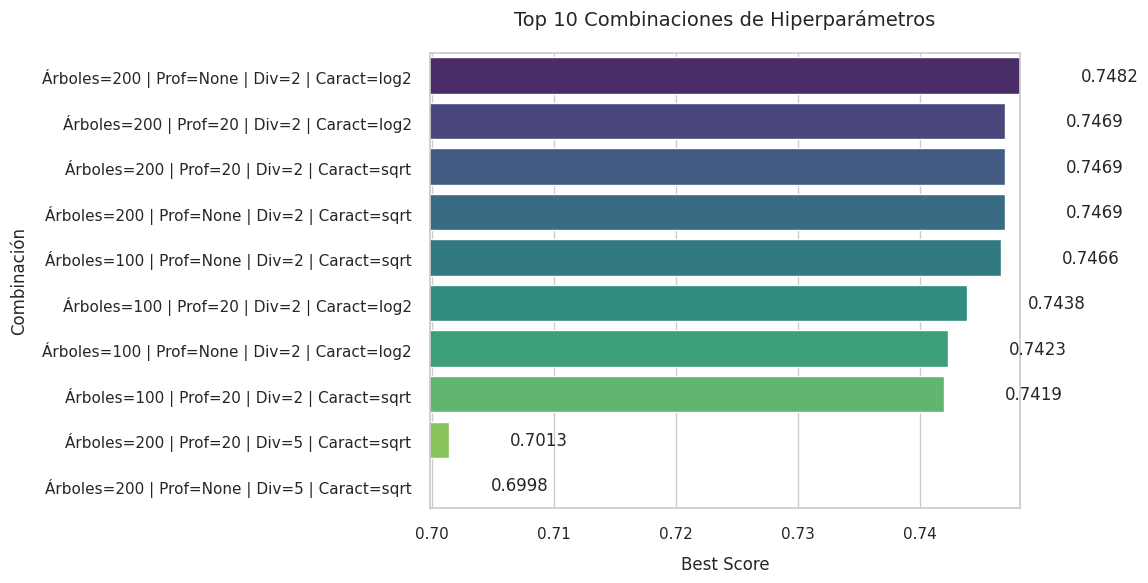

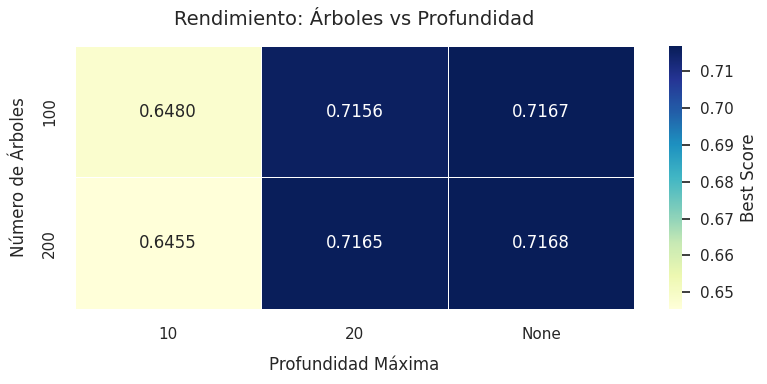

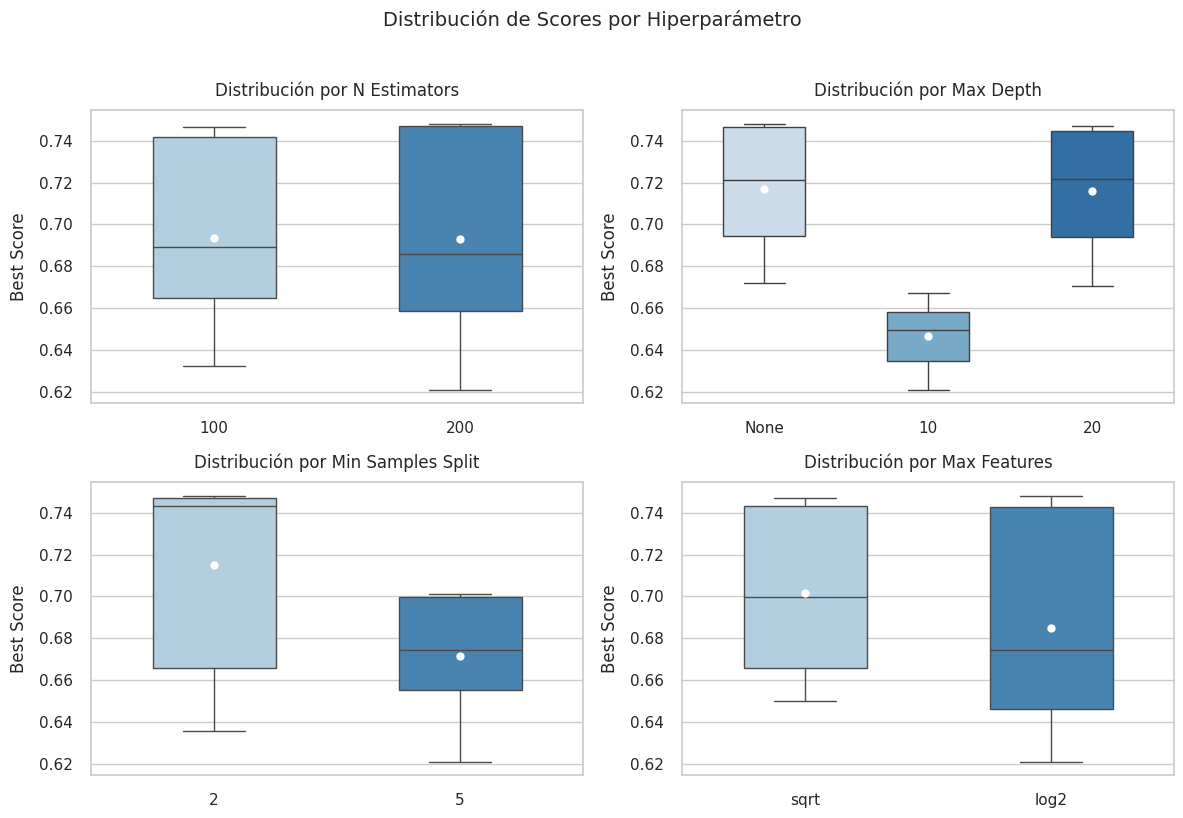

In [54]:
# Configuración general de estilo para todas las gráficas
plt.style.use('seaborn-v0_8')
sns.set_theme(style="whitegrid")

# Ejecutamos el GridSearchCV
grid_search = GridSearchCV(
    estimator=pipeline_rf,
    param_grid=rf_params,
    cv=skf,
    scoring='balanced_accuracy',
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train, y_train)

# Resultados
cv_results = pd.DataFrame(grid_search.cv_results_)
print(f"\nMejores parámetros: {grid_search.best_params_}")
print(f"Mejor score (validación): {grid_search.best_score_:.4f}")


# Gráfica 1: Top 10 combinaciones

plt.figure(figsize=(12, 6))
top_combinations = cv_results.sort_values("mean_test_score", ascending=False).head(10)
top_combinations["combination"] = (
    "Árboles=" + top_combinations["param_classifier__n_estimators"].astype(str) +
    " | Prof=" + top_combinations["param_classifier__max_depth"].astype(str) +
    " | Div=" + top_combinations["param_classifier__min_samples_split"].astype(str) +
    " | Caract=" + top_combinations["param_classifier__max_features"].astype(str)
)

ax = sns.barplot(
    x="mean_test_score",
    y="combination",
    data=top_combinations,
    hue="combination",
    dodge=False,
    legend=False,
    palette="viridis"
)

# Añadimos valores a las barras
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 0.005, p.get_y() + p.get_height()/2.,
            f'{width:.4f}',
            ha='left', va='center')

plt.title("Top 10 Combinaciones de Hiperparámetros", pad=20, fontsize=14)
plt.xlabel("Best Score", labelpad=10)
plt.ylabel("Combinación", labelpad=10)
plt.xlim(top_combinations["mean_test_score"].min(),
         top_combinations["mean_test_score"].max())
plt.tight_layout()
plt.show()


# Gráfica 2: Heatmap

# Convertimos max_depth a string por si hay valores None
cv_results["param_classifier__max_depth_str"] = cv_results["param_classifier__max_depth"].astype(str)

# También convertimos n_estimators
cv_results["param_classifier__n_estimators_str"] = cv_results["param_classifier__n_estimators"].astype(str)

plt.figure(figsize=(8, 4))
heatmap_data = cv_results.pivot_table(
    index="param_classifier__n_estimators_str",
    columns="param_classifier__max_depth_str",
    values="mean_test_score",
    aggfunc="mean"
)

ax = sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".4f",
    cmap="YlGnBu",
    linewidths=.5,
    cbar_kws={'label': 'Best Score'}
)

plt.title("Rendimiento: Árboles vs Profundidad", pad=15, fontsize=14)
plt.xlabel("Profundidad Máxima", labelpad=10)
plt.ylabel("Número de Árboles", labelpad=10)
plt.tight_layout()
plt.show()


# Gráfica 3: Boxplots

plt.figure(figsize=(12, 8))

param_columns = [
    "param_classifier__n_estimators",
    "param_classifier__max_depth",
    "param_classifier__min_samples_split",
    "param_classifier__max_features"
]

for i, param in enumerate(param_columns, 1):
    plt.subplot(2, 2, i)

    # Convertimos a string para evitar errores con None
    cv_results[param] = cv_results[param].astype(str)

    sns.boxplot(
        x=param,
        y="mean_test_score",
        data=cv_results,
        hue=param,
        legend=False,
        width=0.5,
        showmeans=True,
        meanprops={"marker": "o", "markerfacecolor": "white", "markeredgecolor": "black"},
        palette="Blues"
    )

    param_name = param.split('__')[-1].replace('_', ' ').title()
    plt.title(f"Distribución por {param_name}", pad=10)
    plt.xlabel("")
    plt.ylabel("Best Score", labelpad=8)

plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.suptitle("Distribución de Scores por Hiperparámetro", y=1.02, fontsize=14)
plt.tight_layout()
plt.show()

En la gráfica superior titulada “Top 10 Combinaciones de Hiperparámetros”, se identifica una tendencia clara: las configuraciones con Árboles = 200 dominan las primeras posiciones, superando consistentemente a aquellas con Árboles = 100. Este comportamiento se explica por el hecho de que incrementar el número de estimadores en un modelo Random Forest permite capturar una mayor cantidad de patrones presentes en los datos, al tiempo que contribuye a reducir la varianza del modelo. Esto, dentro de ciertos límites, se traduce en una mejora en la capacidad predictiva.

En relación con la profundidad máxima de los árboles, se observa que las configuraciones con Depth = 20, y particularmente aquellas con Depth = None, tienden a ofrecer un mejor rendimiento. Esto sugiere que, para este conjunto de datos, una profundidad mayor —o incluso ilimitada— puede favorecer el desempeño del modelo, posiblemente al permitir una representación más detallada de las relaciones complejas entre las variables. Esta observación se ve confirmada en el mapa de calor titulado “Rendimiento: Árboles vs Profundidad”, donde se evidencia que las combinaciones con 200 árboles y profundidades de None o 20 alcanzan puntuaciones en torno a 0.7165–0.7168, superiores al resto de configuraciones analizadas.

Un análisis más desglosado de los cuatro boxplots situados en la parte inferior proporciona una visión individualizada del impacto de cada hiperparámetro:

Score vs N Estimators: Se aprecia que los modelos con 200 árboles muestran una mediana de precisión levemente superior respecto a los que emplean 100. Esta mejora responde a la capacidad del modelo para reducir la varianza al aumentar el número de estimadores, generando predicciones más estables y, en consecuencia, más precisas.

Score vs Max Depth: Las configuraciones con Depth = None y Depth = 20 obtienen mejores resultados que aquellas con Depth = 10, lo que indica que una mayor profundidad permite al modelo capturar relaciones más complejas. Por el contrario, limitar la profundidad a 10 podría restringir la capacidad del modelo para ajustarse adecuadamente a los datos.

Score vs Min Samples Split: Al comparar los valores de split = 2 y split = 5, se observa un mejor desempeño para el primero. Permitir divisiones con un número mínimo de muestras más reducido posibilita la creación de nodos más específicos, favoreciendo una mayor adaptación a los patrones locales del conjunto de datos.

Score vs Max Features: La comparación entre los criterios sqrt y log2 revela cierta variabilidad en el rendimiento. Si bien ambos enfoques ofrecen resultados competitivos, sqrt presenta un rango más amplio de puntuaciones, mientras que log2 muestra una mayor estabilidad y valores máximos más consistentes. La elección entre ambos dependerá del balance que se quiera lograr entre diversidad en los árboles y precisión individual.

En conjunto, la combinación óptima de estos hiperparámetros permite alcanzar una puntuación máxima de 0.7482, lo que refleja un balance adecuado entre complejidad y capacidad de generalización. La configuración que conduce a este rendimiento está compuesta por Árboles = 200, Profundidad = None, División mínima = 2, y Características = log2, lo que evidencia un ajuste eficiente del modelo para este caso particular.

# USO DE IA

A lo largo del desarrollo de la práctica, la inteligencia artificial ha sido empleada principalmente con dos propósitos:


1.   Búsqueda de teoría y conceptos: En lugar de realizar búsquedas manuales en motores como Google, se ha optado por consultar directamente a chatbots. Esta alternativa resulta considerablemente más eficiente, ya que permite obtener respuestas rápidas y precisas a preguntas específicas, facilitando así la comprensión de conceptos teóricos relevantes para el trabajo.

2.   Sugerencias para el diseño de las gráficas: Dado que no contamos con un conocimiento exhaustivo sobre todos los tipos de gráficos existentes ni sobre cuál podría ser el más adecuado para cada caso, recurrimos a la inteligencia artificial como apoyo para explorar opciones de visualización. Esto nos permitió identificar representaciones gráficas más apropiadas para reflejar los resultados obtenidos de manera clara y efectiva.